In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder



# Read and Review the dataset for churn 

### Read csv file

In [2]:
print(os.path.exists("variant_1.csv"))

True


In [3]:
df = pd.read_csv("variant_1.csv")

In [4]:
print('columns count - ',len(df.columns), '\n')
print('columns: ',list(df.columns))

columns count -  34 

columns:  ['Unnamed: 0', 'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status']


In [5]:
print('Samples count: ',df.shape[0])

Samples count:  148670


In [6]:
display(df.head(5))

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1
2,2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0


### Chek missing data

In [7]:
print("Any missing sample in training set:",df.isnull().values.any())

Any missing sample in training set: True


In [8]:
for col in df.columns:
    if df[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  loan_limit
Missing data in  approv_in_adv
Missing data in  loan_purpose
Missing data in  rate_of_interest
Missing data in  Interest_rate_spread
Missing data in  Upfront_charges
Missing data in  term
Missing data in  Neg_ammortization
Missing data in  property_value
Missing data in  income
Missing data in  age
Missing data in  submission_of_application
Missing data in  LTV


In [9]:
missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())
        missing.append(x)

loan_limit 3344
approv_in_adv 908
loan_purpose 134
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
property_value 15098
income 9150
age 200
submission_of_application 200
LTV 15098


### Unique values count

In [10]:
df.nunique()

Unnamed: 0                   148670
ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type    

### Distribution statistics

In [11]:
df.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


### Values type descriptions

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   ID                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   Gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   Credit_Worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           112231 non-null  float64
 13  Interest_rate_spread       11

# Очищення аномальних значень

In [1]:
#income, loan, upfront_charges, property_value, LTV, rate_of_interest

In [14]:
df.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


## IQR

In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 3 * IQR
    upper_limit = Q3 + 3 * IQR
    
    # Створюємо маску для викидів
    outlier_mask = (df[column] < lower_limit) | (df[column] > upper_limit)
    
    # Видаляємо всі рядки, де є аномалії
    df = df[~outlier_mask]
    
    return df

In [16]:
# Характеристики, які будемо виводити
columns_to_plot = ['income', 'loan_amount', 'Upfront_charges', 'property_value', 'LTV', 'rate_of_interest']
# Characteristics for which we'll remove outliers
columns_to_process = ['income', 'loan_amount', 'Upfront_charges', 'property_value', 'LTV', 'rate_of_interest']

In [17]:
# Clean data for all characteristics with information output
for column in columns_to_process:
    original_count = len(df)
    df = remove_outliers_iqr(df, column)
    removed_count = original_count - len(df)
    print(f"Removed {removed_count} outliers from {column}")

# Verify that both 0 and 1 are still present in the Status column
status_counts = df['Status'].value_counts()
print("\nStatus value counts after outlier removal:")
print(status_counts)

Removed 2097 outliers from income
Removed 231 outliers from loan_amount
Removed 408 outliers from Upfront_charges
Removed 1306 outliers from property_value
Removed 27 outliers from LTV
Removed 14 outliers from rate_of_interest

Status value counts after outlier removal:
Status
0    108913
1     35674
Name: count, dtype: int64


In [18]:
df.describe().round(2)

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,144587.00,144587.00,144587.0,144587.00,109112.00,108913.00,106091.00,144549.00,129771.00,135475.00,144587.00,129771.00,144587.00
mean,74311.72,99201.72,2019.0,321875.24,4.05,0.45,3157.59,335.33,466985.75,6413.90,699.81,73.13,0.25
std,42923.69,42923.69,0.0,165949.84,0.56,0.51,3021.23,58.12,265237.50,3784.69,115.87,18.34,0.43
min,0.00,24890.00,2019.0,16500.00,2.12,-1.08,0.00,96.00,18000.00,0.00,500.00,3.08,0.00
25%,37132.50,62022.50,2019.0,196500.00,3.62,0.08,598.83,360.00,268000.00,3660.00,599.00,61.43,0.00
50%,74319.00,99209.00,2019.0,296500.00,3.99,0.40,2605.18,360.00,408000.00,5640.00,699.00,75.39,0.00
75%,111481.50,136371.50,2019.0,426500.00,4.38,0.78,4777.50,360.00,608000.00,8280.00,800.00,86.53,0.00
max,148669.00,173559.00,2019.0,1156500.00,6.50,2.54,17436.60,360.00,1628000.00,22920.00,900.00,159.38,1.00


In [19]:
df.nunique()

Unnamed: 0                   144587
ID                           144587
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     115
rate_of_interest                118
Interest_rate_spread          22403
Upfront_charges               56894
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  162
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                          383
credit_type                       4
Credit_Score                    401
co-applicant_credit_type    

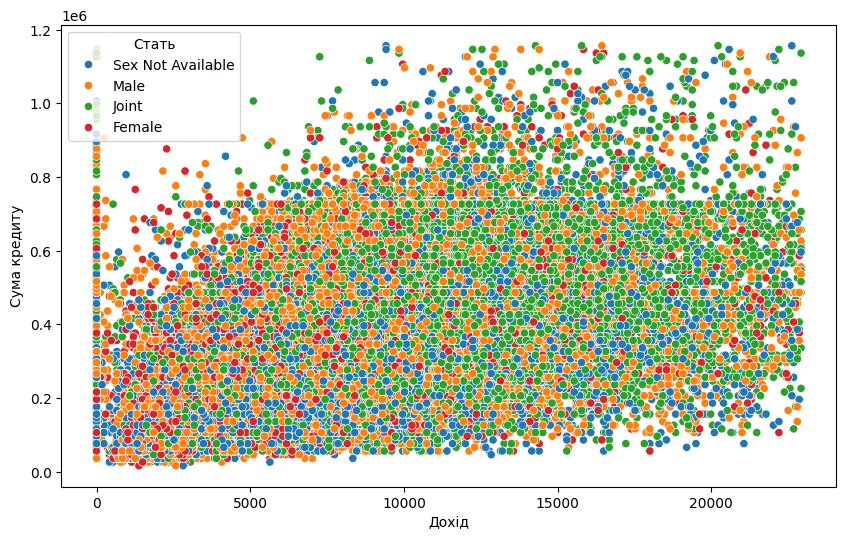

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['income'], y=df['loan_amount'], hue='Gender')
plt.xlabel('Дохід')
plt.ylabel('Сума кредиту')
plt.legend(title='Стать')
plt.show()

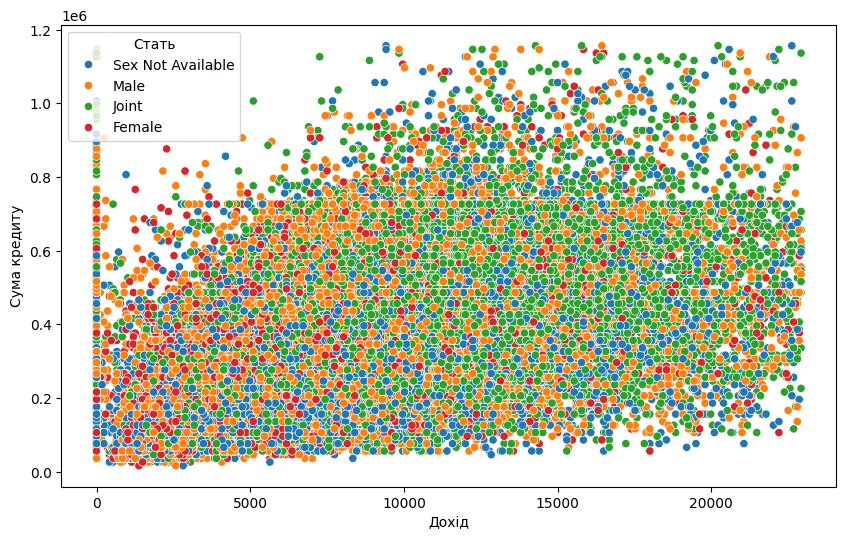

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['income'], y=df['loan_amount'], hue='Gender')
plt.xlabel('Дохід')
plt.ylabel('Сума кредиту')
plt.legend(title='Стать')
plt.show()

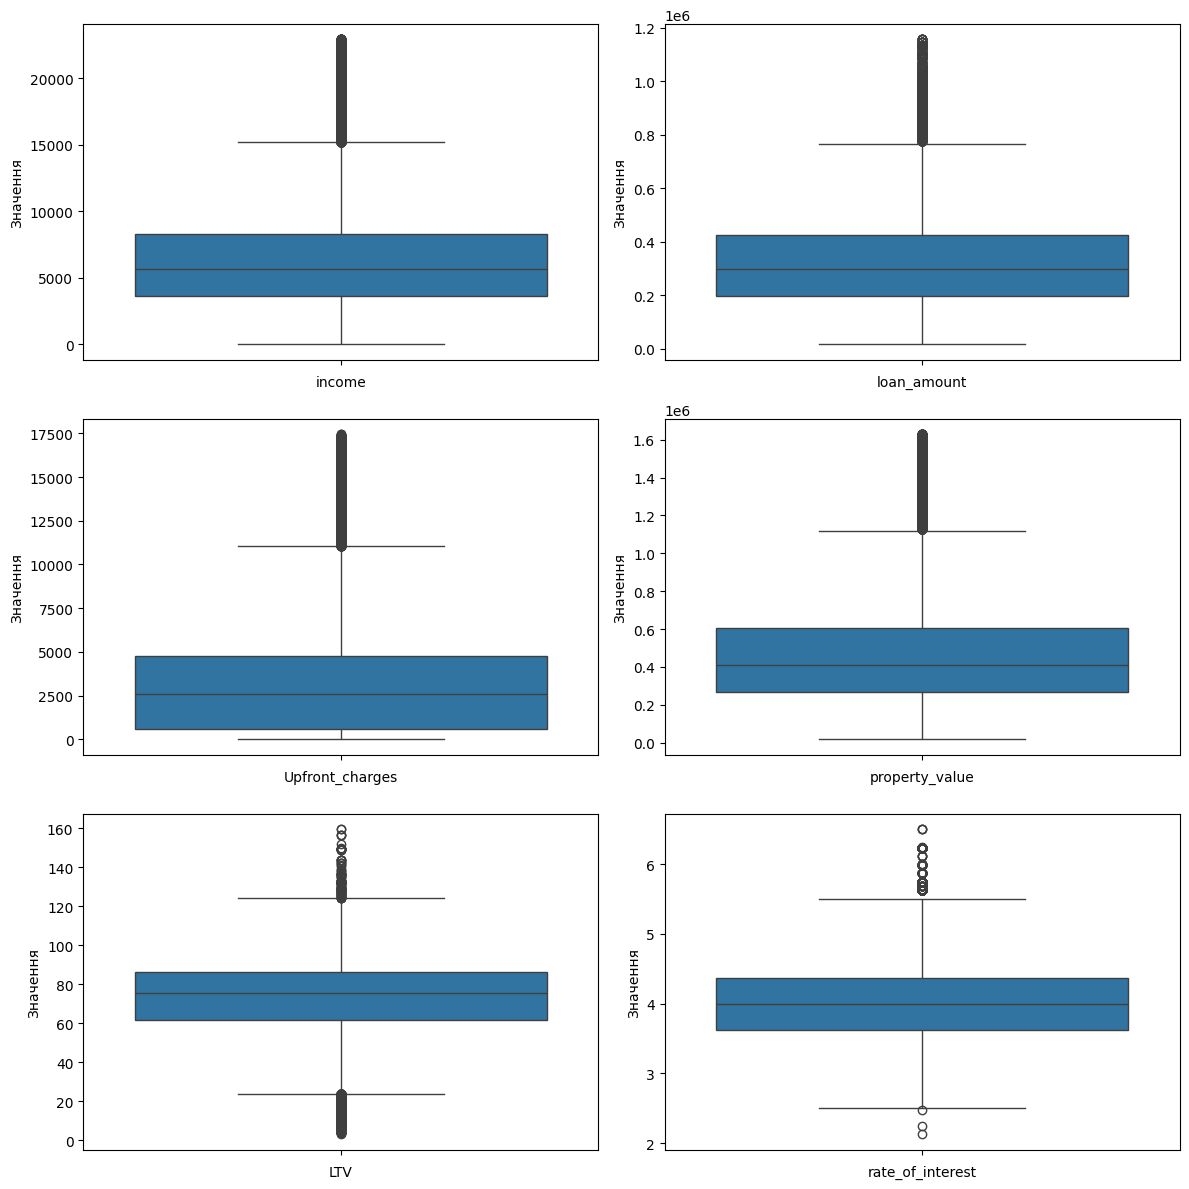

In [22]:
plt.figure(figsize=(12, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df[column])
    plt.xlabel(columns_to_process[i-1])
    plt.ylabel('Значення')

plt.tight_layout()
plt.show()

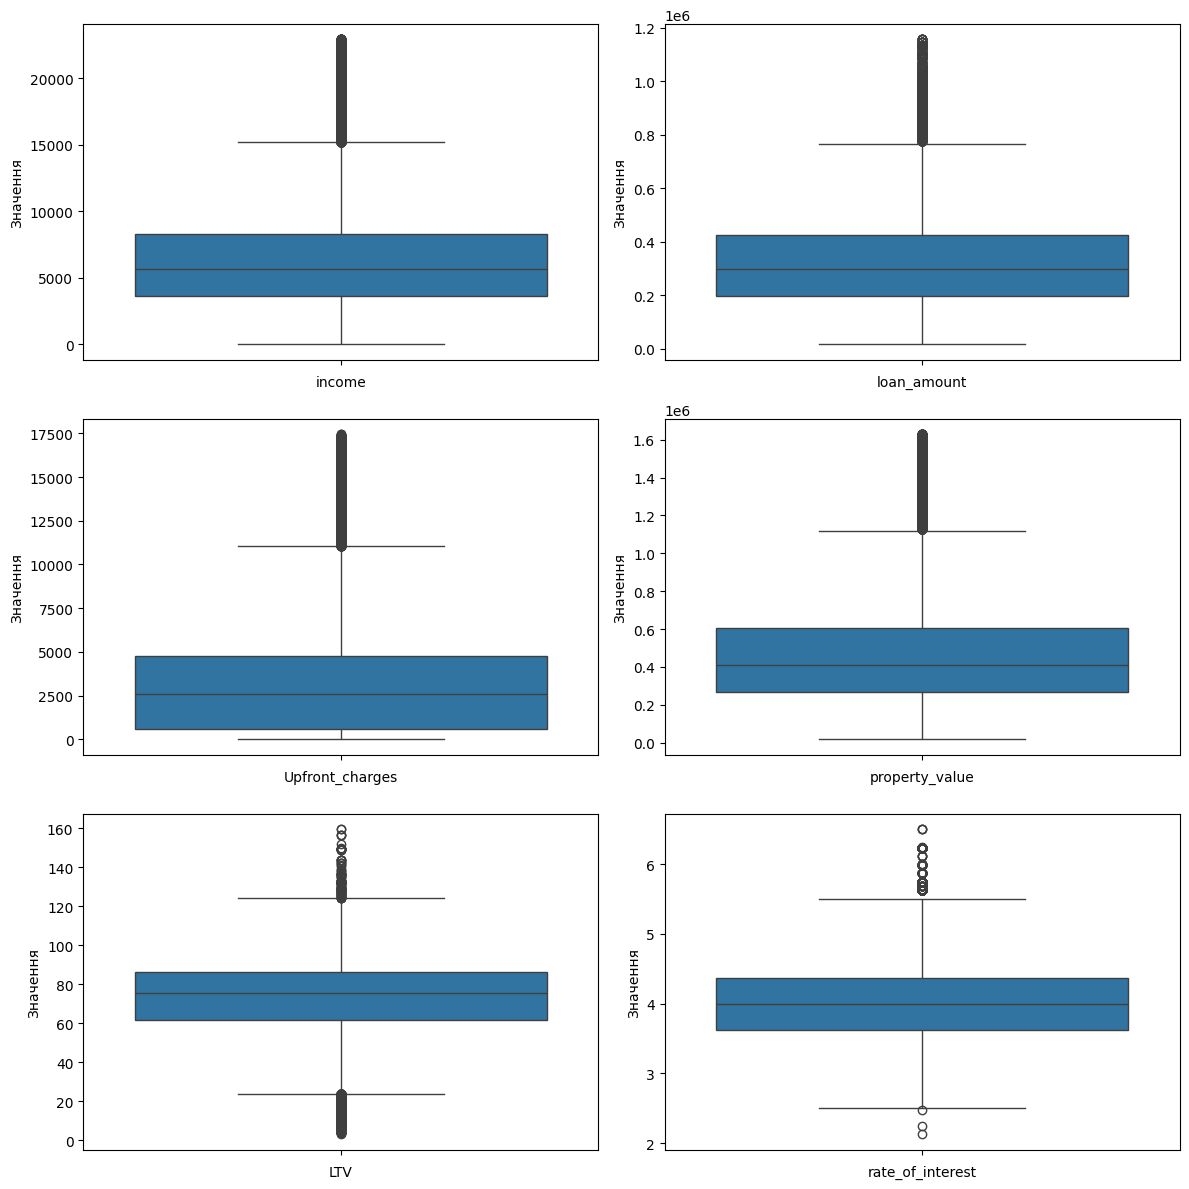

In [23]:
plt.figure(figsize=(12, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df[column])
    plt.xlabel(columns_to_process[i-1])
    plt.ylabel('Значення')

plt.tight_layout()
plt.show()

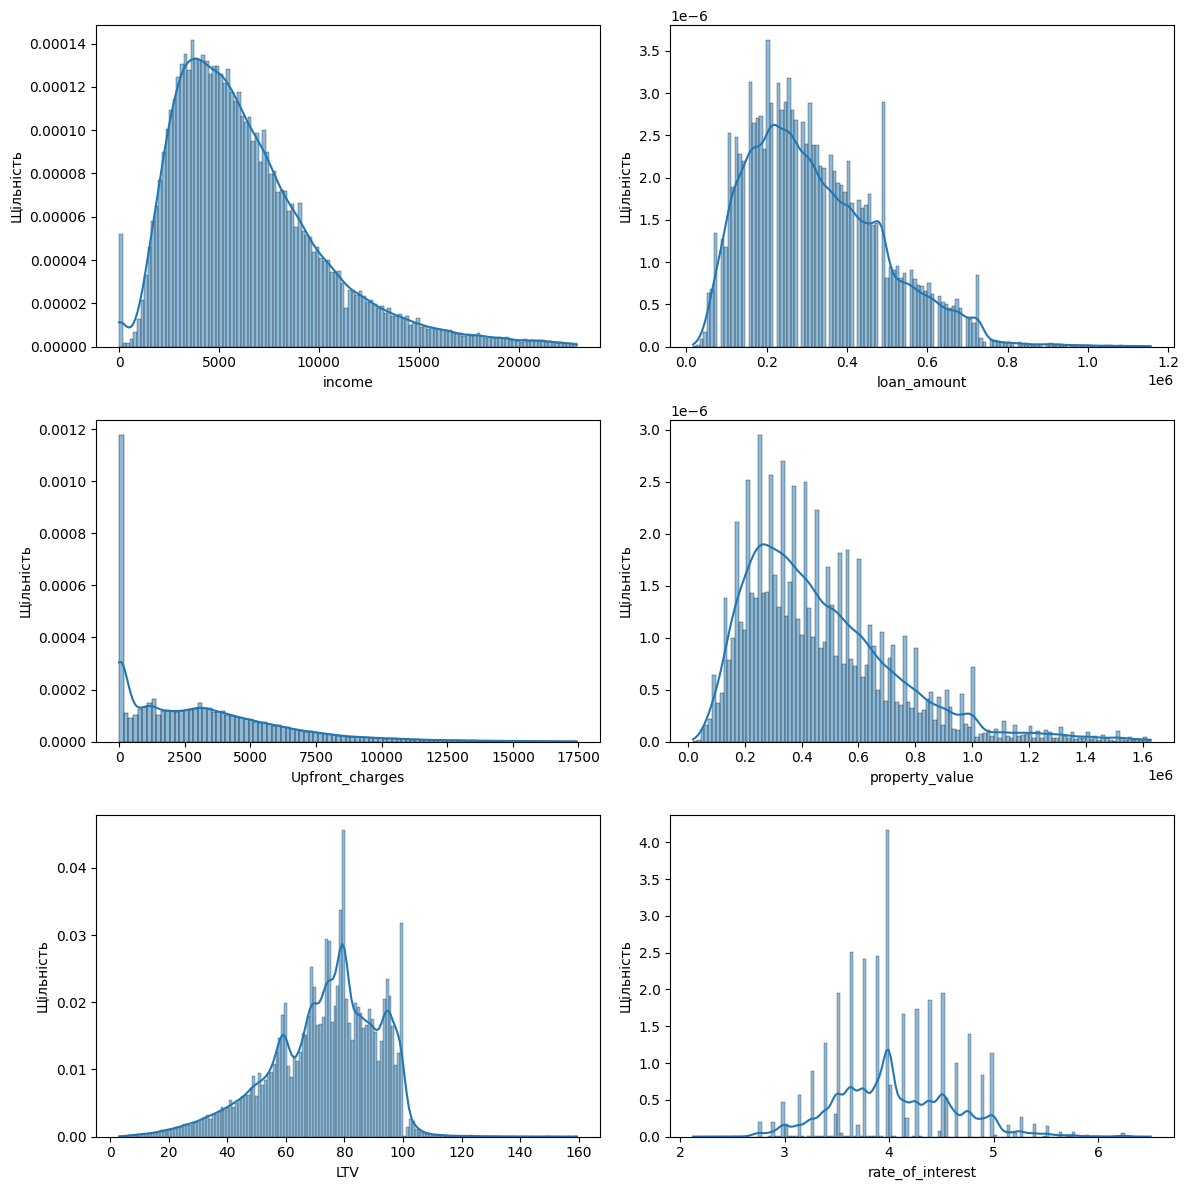

In [24]:
plt.figure(figsize=(12, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, stat="density")
    plt.xlabel(columns_to_process[i-1])
    plt.ylabel('Щільність')

plt.tight_layout()
plt.show()

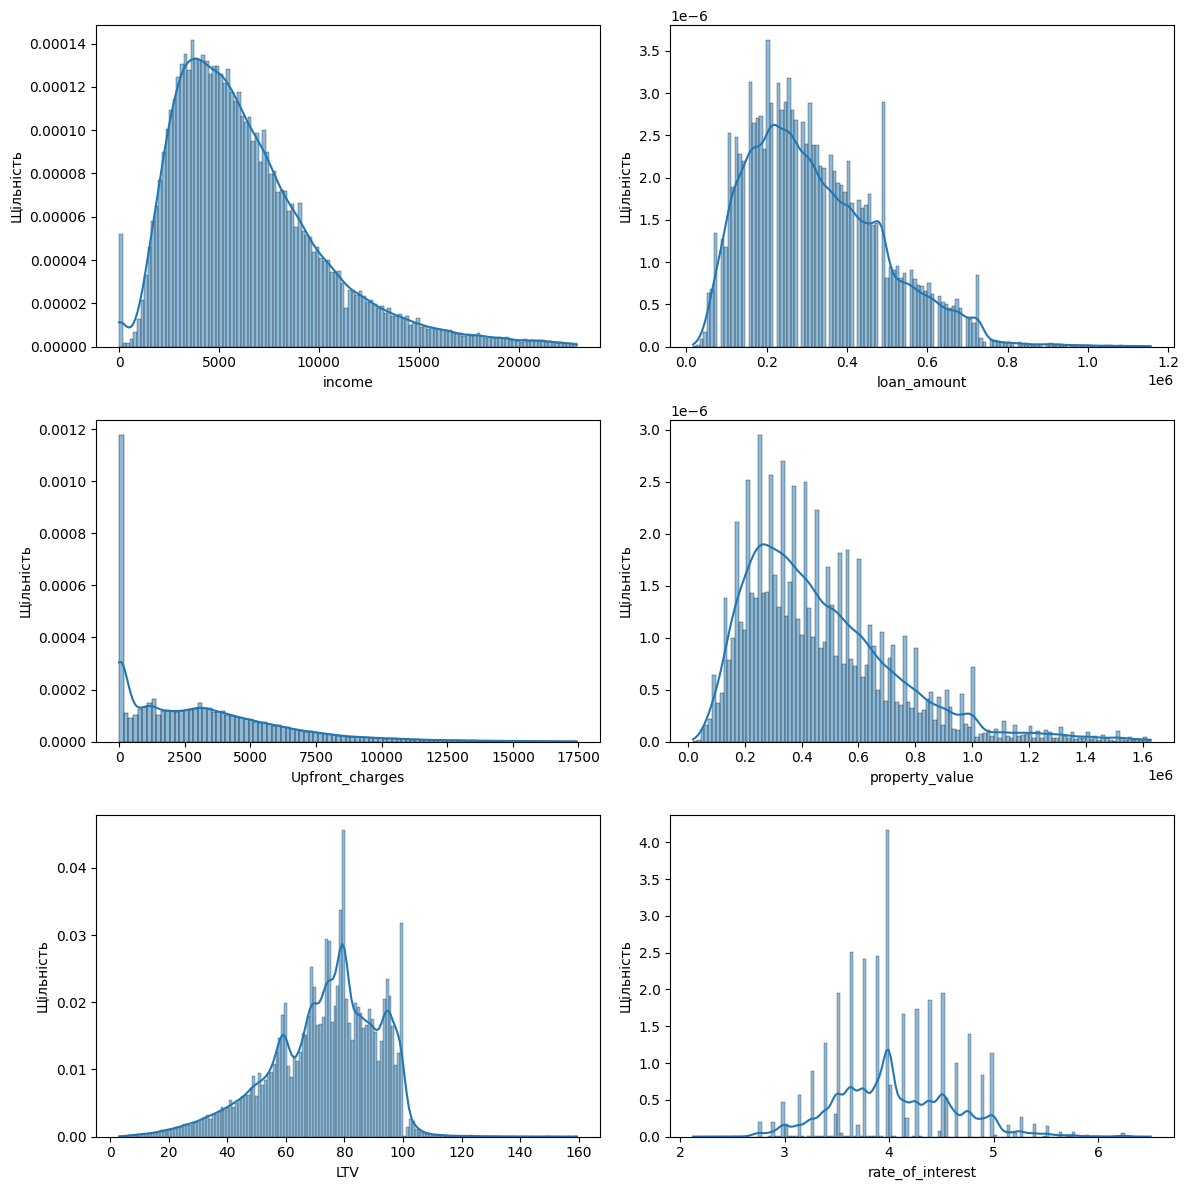

In [25]:
plt.figure(figsize=(12, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, stat="density")
    plt.xlabel(columns_to_process[i-1])
    plt.ylabel('Щільність')

plt.tight_layout()
plt.show()

# Заповнення пропущених значень

In [26]:
for col in df.columns:
    if df[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  loan_limit
Missing data in  approv_in_adv
Missing data in  loan_purpose
Missing data in  rate_of_interest
Missing data in  Interest_rate_spread
Missing data in  Upfront_charges
Missing data in  term
Missing data in  Neg_ammortization
Missing data in  property_value
Missing data in  income
Missing data in  age
Missing data in  submission_of_application
Missing data in  LTV


In [27]:
missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())
        missing.append(x)

loan_limit 3271
approv_in_adv 883
loan_purpose 131
rate_of_interest 35475
Interest_rate_spread 35674
Upfront_charges 38496
term 38
Neg_ammortization 117
property_value 14816
income 9112
age 199
submission_of_application 199
LTV 14816


In [28]:
fill_methods = {
    'rate_of_interest': 'mean',
    'Interest_rate_spread': 'mean',
    'Upfront_charges': 'mean',
    'term': 'mean',
    'property_value': 'mean',
    'income': 'mean',
    'LTV': 'mean',

    'loan_limit': 'mode',
    'approv_in_adv': 'mode',
    'loan_purpose': 'mode',
    'Neg_ammortization': 'mode',
    'age': 'mode',
    'submission_of_application': 'mode',
}

In [29]:
for column, method in fill_methods.items():
    if method == 'mean':
        df[column] = df[column].fillna(df[column].mean())
    elif method == 'mode':
        df[column] = df[column].fillna(df[column].mode()[0])

In [30]:
print(df.isnull().sum())

Unnamed: 0                   0
ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security

In [31]:
df

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,...,4980.0,EQUI,552,EXP,55-64,to_inst,73.134888,North,direct,1
2,2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,...,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0
148666,148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,...,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0
148667,148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,...,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0
148668,148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,...,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0


## Кодування категоріальних характеристик

In [32]:
categorical_columns = [
    'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness',
    'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment',
    'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type',
    'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type'
]

In [33]:
le = LabelEncoder()

In [34]:
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [35]:
df['Status'] = df['Status'].apply(lambda x: 'yes' if x == 1 else 'no')

In [36]:
df.head(10)

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,24890,2019,0,3,0,0,0,0,0,...,1740.0,3,758,0,0,1,98.728814,3,1,yes
1,1,24891,2019,0,2,0,1,0,0,0,...,4980.0,2,552,1,3,1,73.134888,0,1,yes
2,2,24892,2019,0,2,1,0,0,0,0,...,9480.0,3,834,0,1,1,80.019685,3,1,no
3,3,24893,2019,0,2,0,0,3,0,0,...,11880.0,3,587,0,2,0,69.376900,0,1,no
4,4,24894,2019,0,1,1,0,0,0,0,...,10440.0,1,602,1,0,0,91.886544,0,1,no
5,5,24895,2019,0,1,1,0,0,0,0,...,10080.0,3,864,1,1,0,70.089286,0,1,no
6,6,24896,2019,0,1,1,0,2,0,0,...,5040.0,3,860,1,3,1,79.109589,0,1,no
7,7,24897,2019,0,0,0,0,3,0,0,...,3780.0,0,863,0,3,1,86.525974,0,1,no
8,8,24898,2019,0,1,0,0,2,0,0,...,5580.0,0,580,1,3,1,78.765690,2,1,no
9,9,24899,2019,0,3,0,2,2,0,0,...,6720.0,0,788,1,3,1,63.444767,3,1,no


## Масштабування

In [37]:
scaler_columns = ['loan_amount', 'income', 'Upfront_charges', 'property_value']

In [38]:
scaler = StandardScaler()
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [39]:
df[scaler_columns].head()

,loan_amount,income,Upfront_charges,property_value
0,-1.237578,-1.275810,0.000000,-1.388834e+00
1,-0.695244,-0.391405,0.000000,-2.316449e-16
2,0.509944,0.836936,-0.990199,1.632215e-01
3,0.811240,1.492051,0.000000,7.601658e-01
4,2.257466,1.098982,-1.220110,1.158129e+00


In [40]:
df[scaler_columns].describe()

,loan_amount,income,Upfront_charges,property_value
count,1.445870e+05,1.445870e+05,1.445870e+05,1.445870e+05
mean,-2.064003e-17,2.657158e-16,7.383724e-17,-2.890095e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.840172e+00,-1.750768e+00,-1.220110e+00,-1.786797e+00
25%,-7.555034e-01,-7.189620e-01,-7.371028e-01,-7.122968e-01
50%,-1.529096e-01,-1.293586e-01,0.000000e+00,-7.555624e-02
75%,6.304623e-01,4.438668e-01,2.772124e-01,4.417955e-01
max,5.029397e+00,4.505579e+00,5.517493e+00,4.620406e+00


In [41]:
df.describe()

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type
count,144587.000000,144587.000000,144587.0,144587.000000,144587.000000,144587.000000,144587.000000,144587.000000,144587.000000,144587.000000,...,144587.000000,1.445870e+05,144587.000000,144587.000000,144587.000000,144587.000000,144587.000000,144587.000000,144587.000000,144587.000000
mean,74311.716683,99201.716683,2019.0,0.060365,1.607890,0.156370,0.345557,1.879955,0.041802,0.002849,...,0.019165,2.657158e-16,1.338682,699.812888,0.496303,2.231535,0.649560,73.134888,1.416144,0.999779
std,42923.690701,42923.690701,0.0,0.238163,1.057429,0.363207,0.654530,1.142646,0.200137,0.053305,...,0.183752,1.000003e+00,1.193997,115.874584,0.499988,1.522579,0.477109,17.375832,1.451926,0.014875
min,0.000000,24890.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.750768e+00,0.000000,500.000000,0.000000,0.000000,0.000000,3.083554,0.000000,0.000000
25%,37132.500000,62022.500000,2019.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,-7.189620e-01,0.000000,599.000000,0.000000,1.000000,0.000000,64.182058,0.000000,1.000000
50%,74319.000000,99209.000000,2019.0,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,-1.293586e-01,1.000000,699.000000,0.000000,2.000000,1.000000,73.437500,0.000000,1.000000
75%,111481.500000,136371.500000,2019.0,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,4.438668e-01,3.000000,800.000000,1.000000,3.000000,1.000000,84.962871,3.000000,1.000000
max,148669.000000,173559.000000,2019.0,1.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,...,3.000000,4.505579e+00,3.000000,900.000000,1.000000,6.000000,1.000000,159.375000,3.000000,1.000000


In [42]:
df.to_csv('new_variant_1.csv', index=False)